In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree

In [24]:
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']

df = pd.read_csv('flag.data', names=cols)
df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [25]:
# variable names to use as predictors
var = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange', 
       'mainhue','bars','stripes', 'circles','crosses', 'saltires',
       'quarters','sunstars','triangle','animate']

In [26]:
#Print number of countries by landmass, or continent
print(df['landmass'].value_counts())

landmass
4    52
5    39
3    35
1    31
6    20
2    17
Name: count, dtype: int64


`landmass`: 1 = N.America, 2 = S.America, 3 = Europe, 4 = Africa, 5 = Asia, 6 = Oceania

In [27]:
#Create a new dataframe with only flags from Europe and Oceania
df_36 = df[df["landmass"].isin([3,6])]

In [28]:
#Create labels for only Europe and Oceania
labels = df_36["landmass"]

In [29]:
#Create dummy variables for categorical predictors
data = pd.get_dummies(df_36[var])

data.head()

,red,green,blue,gold,white,black,orange,bars,stripes,circles,...,quarters,sunstars,triangle,animate,mainhue_black,mainhue_blue,mainhue_gold,mainhue_green,mainhue_red,mainhue_white
1,1,0,0,1,0,1,0,0,0,0,...,0,1,0,1,False,False,False,False,True,False
3,1,0,1,1,1,0,1,0,0,0,...,0,0,1,1,False,True,False,False,False,False
4,1,0,1,1,0,0,0,3,0,0,...,0,0,0,0,False,False,True,False,False,False
10,1,0,1,0,1,0,0,0,0,0,...,1,6,0,0,False,True,False,False,False,False
11,1,0,0,0,1,0,0,0,3,0,...,0,0,0,0,False,False,False,False,True,False


In [40]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=10, test_size=.4)

In [43]:
depths = range(1, 21)
acc_depth = []
for i in depths:
    dt = DecisionTreeClassifier(random_state = 10, max_depth = i)
    dt.fit(X_train, y_train)
    acc_depth.append(dt.score(X_test, y_test))

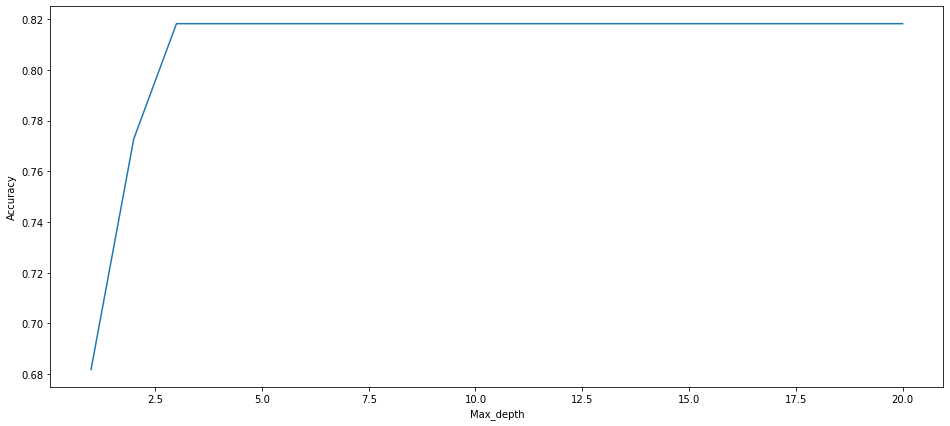

In [45]:
plt.figure(figsize = (16, 7))

plt.plot(depths, acc_depth)
plt.xlabel("Max_depth")
plt.ylabel("Accuracy")
plt.show()

In [52]:
max_acc = np.max(acc_depth)
best_depth = depths[np.argmax(acc_depth)]

print(f"Highest Accuracy is {(max_acc * 100):.3f}% with depth = {best_depth}")

Highest Accuracy is 81.818% with depth = 3


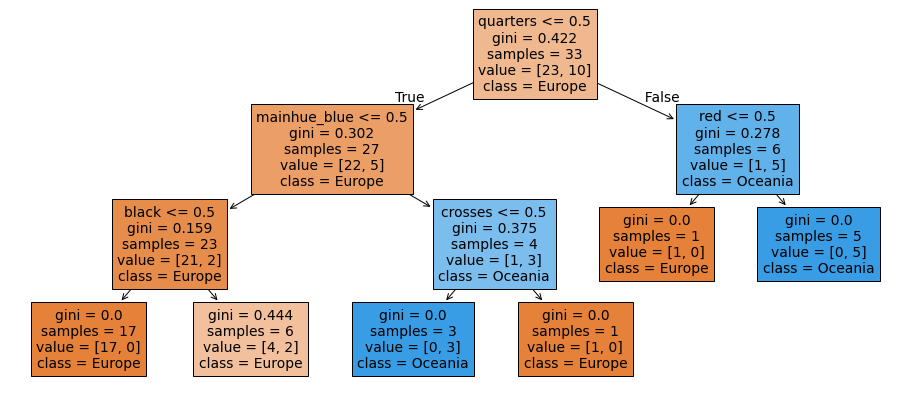

In [53]:
plt.figure(figsize=(16,7))
dt = DecisionTreeClassifier(random_state = 1, max_depth = best_depth)
dt.fit(X_train, y_train)

tree.plot_tree(dt, feature_names = X_train.columns, class_names = ['Europe', 'Oceania'], filled = True)
plt.show()

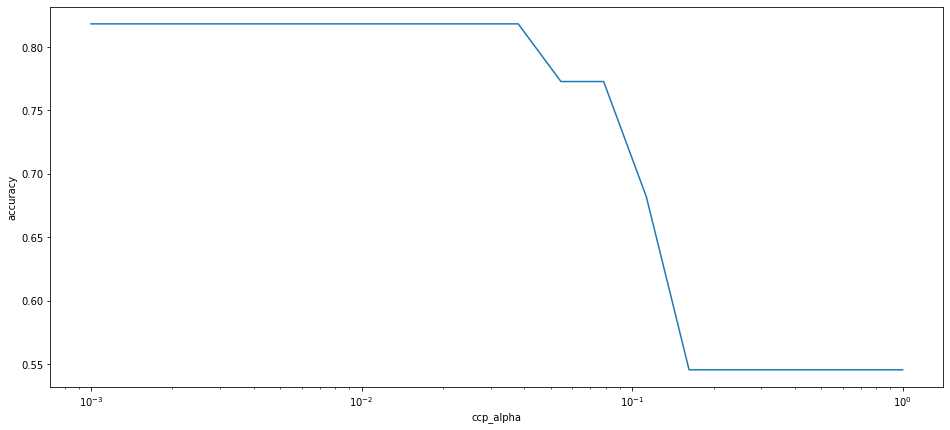

In [56]:
acc_pruned = []
ccp = np.logspace(-3, 0, num=20)

for i in ccp:
    dt = DecisionTreeClassifier(random_state = 10, max_depth = best_depth, ccp_alpha = i)
    dt.fit(X_train, y_train)
    acc_pruned.append(dt.score(X_test, y_test))

plt.figure(figsize = (16, 7))
plt.plot(ccp, acc_pruned)
plt.xscale('log')
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')
plt.show()

In [61]:
max_acc_pruned = np.max(acc_pruned)
best_ccp = ccp[np.argmax(acc_pruned)]

print(f'Highest accuracy {(max_acc_pruned*100):.3f}% at ccp_alpha {best_ccp}')

Highest accuracy 81.818% at ccp_alpha 0.001
